In [17]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

# Задание 1

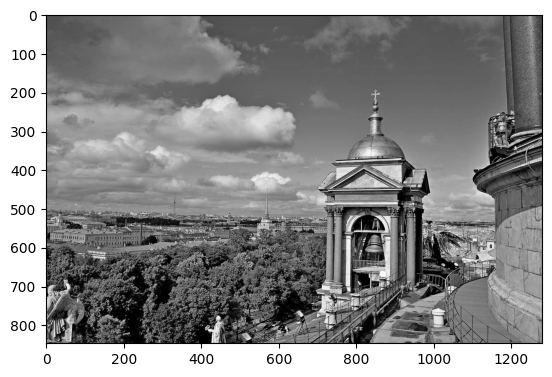

In [19]:
# 1. С помощью библиотеки OpenCV считайте изображение
# 2. преобразуйте в градации серого:
img = cv2.imread('/content/peter-3794597_1280.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray');

In [20]:
# 3. Выполните вейвлет-преобразование Хаара.

wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

In [28]:
hist, bins = np.histogram(cH.flatten(), bins=256)
max_value = np.max(hist)
print('Максимальное значение функции', max_value)

Максимальное значение функции 44949


# Задание 2

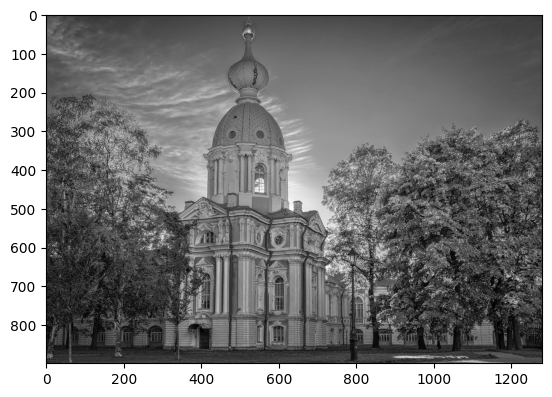

In [36]:
# 1. С помощью библиотеки OpenCV считайте изображение
img = cv2.imread('/content/monastery-3714287_1280.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray');

In [37]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

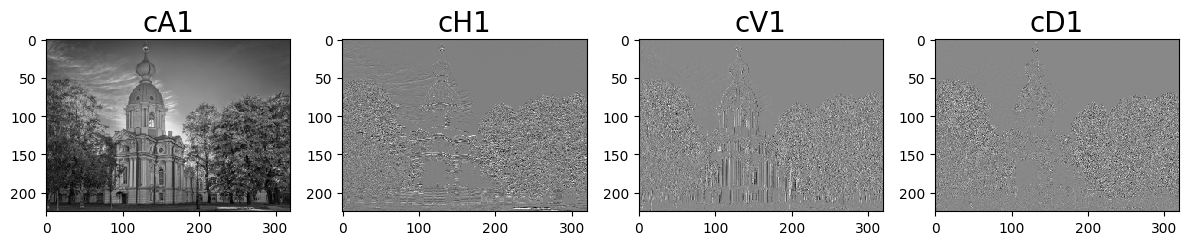

In [38]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [39]:
coeffs_cA1 = pywt.dwt2(cA, 'haar')
threshold = 40
cA1, _ = coeffs_cA1
cA1[np.abs(cA1) < threshold] = 0
zero_count = np.count_nonzero(cA1 == 0)

print("Количество обнуленных коэффициентов cA1:", zero_count)

Количество обнуленных коэффициентов cA1: 143
